# Optimizing Price using Regression

In [11]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

## Data

In [5]:
# Load data
beef = pd.read_csv('https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/beef.csv')

In [6]:
# Explore data
beef.head(5)

,Year,Quarter,Quantity,Price
0,1977,1,22.9976,142.1667
1,1977,2,22.6131,143.9333
2,1977,3,23.4054,146.5000
3,1977,4,22.7401,150.8000
4,1978,1,22.0441,160.0000


In [7]:
beef.shape

(91, 4)

The dataset contains a total of 91 observations of quantity-price pairs with 4 variables.

## EDA

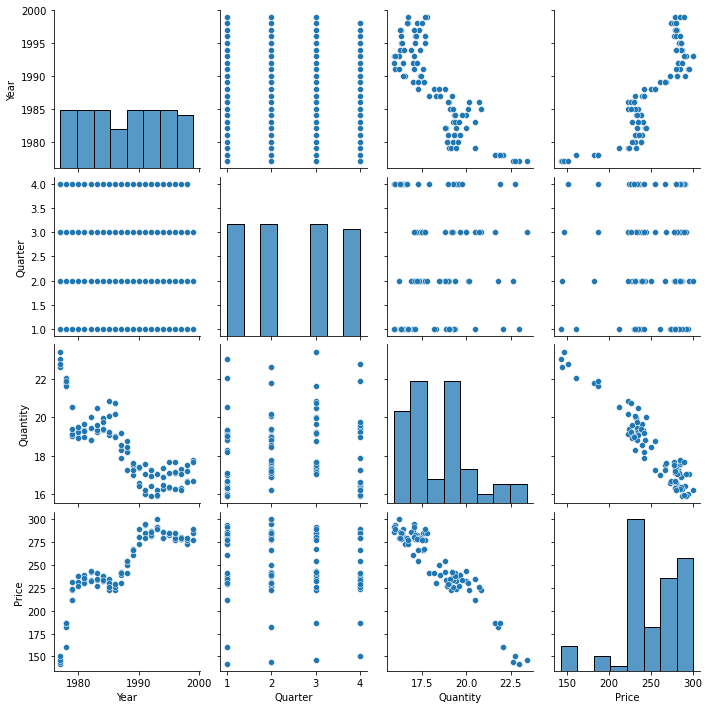

In [12]:
sns.pairplot(beef)

## Estimate the demand function

First, we need to establish the relationship between quantity and price. 

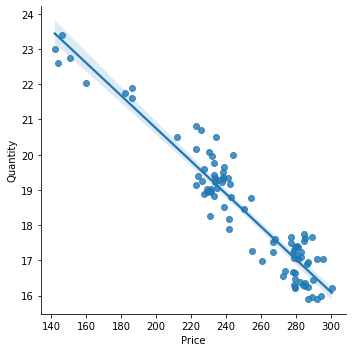

In [15]:
sns.lmplot(x = 'Price', y = 'Quantity', data = beef)

To find the demand function we will fit an Ordinary Least Square (OLS) regression model.

In [17]:
# OLS model
model = ols('Quantity ~ Price', data = beef).fit()

In [18]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     811.2
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           1.69e-46
Time:                        20:48:55   Log-Likelihood:                -77.493
No. Observations:                  91   AIC:                             159.0
Df Residuals:                      89   BIC:                             164.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.0515      0.413     72.701      0.0

The R-squared measurement indicates how much of the independent variable is explained by changes in our dependent variable. Our model explains 90.1% of the change in our 'Quantity' variable. 

## Profit-maximazing price

In [66]:
# revenue = quantity * price
# profit = revenue - cost
# profit = quantity * price - cost

# a range of diffferent prices to find the optimum one
start_price = round(beef.Price.min()) - 10
end_price = round(beef.Price.max()) + 300
price = np.arange(start_price, end_price, 1)

# assuming a fixed cost
cost = 80

intercepto = model.params[0]
pendiente = model.params[1]

# regression coefficients
#quantity = intercept - pendiente * price

# profit function
#profit = quantity * price - cost

In [67]:
revenue = []

for i in price:
    quantity_demanded = intercepto + pendiente * i
    revenue.append((i - cost) * quantity_demanded)
    
profit = pd.DataFrame({'Price':price, 'Revenue':revenue})

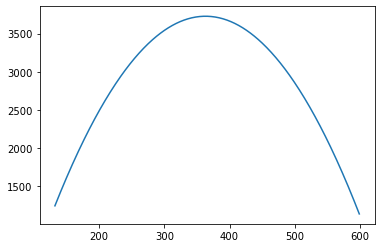

In [73]:
plt.plot(profit['Price'], profit['Revenue'])

In [72]:
# price at which revenue is maximum
profit[profit['Revenue'] == profit['Revenue'].max()]

,Price,Revenue
231,363,3726.563075


So we find that the maximum revenue at different price levels is reached at \\$3726 when the price is set at \\$363